# Pyber Challenge

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
Total_Rides = pyber_data_df.groupby(['type']).count()['ride_id']

In [4]:
# 2. Get the total drivers for each city type
Total_Drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
Total_Fares = pyber_data_df.groupby(["type"]).sum()['fare']

In [6]:
#  4. Get the average fare per ride for each city type. 
Average_Fare_per_Ride = Total_Fares / Total_Rides

In [7]:
# 5. Get the average fare per driver for each city type. 
Average_Fare_per_Driver = Total_Fares / Total_Drivers

In [8]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.DataFrame(
          {"Total Rides": Total_Rides,
          "Total Drivers": Total_Drivers,
          "Total Fares": Total_Fares,
          "Average Fare per Ride": Average_Fare_per_Ride,
          "Average Fare per Driver": Average_Fare_per_Driver})
          
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [10]:
#  8. Format the columns.
PyBer_summary_df["Total Rides"] = PyBer_summary_df["Total Rides"].map("{:,.0f}".format)

PyBer_summary_df["Total Drivers"] = PyBer_summary_df["Total Drivers"].map("{:,.0f}".format)

PyBer_summary_df["Total Fares"] = PyBer_summary_df["Total Fares"].map("${:,.2f}".format)

PyBer_summary_df["Average Fare per Ride"] = PyBer_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

PyBer_summary_df["Average Fare per Driver"] = PyBer_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

PyBer_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_data_df.groupby(['type','date']).sum()['fare']

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()

In [27]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

#pivot = pyber_data_df.pivot_table(index =['date'], 
                                  #values ='fare')
                                    #columns =['type']
        
pivot_table_df = pyber_data_df.pivot_table(index =['date'],  
                       columns =['type'],  
                       values = 'fare') 
                                  
pivot_table_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [28]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pivot_table_df.loc['2019-01-01':'2019-04-29']


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [30]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pivot_table_df.index = pd.to_datetime(pivot_table_df.index)

In [31]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_table_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [33]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_fares_week = pivot_table_df.resample('W').sum()
sum_of_fares_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [34]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


In [41]:
# Set the x-axis to a list of strings for each month.
x_axis = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [10.02, 23.24, 39.20, 35.42, 32.34, 27.04, 43.82, 10.56, 11.85, 27.90, 20.71, 20.09]


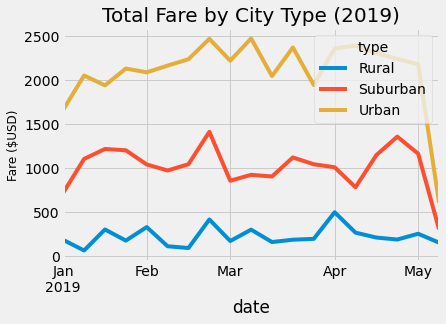

In [45]:
# Create the plot with ax.plt() (vertical)
#fig, ax = plt.subplots()
ax = sum_of_fares_week.plot()

# Incorporate the other graph properties
plt.title("Total Fare by City Type (2019)", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.grid(True)


# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")

# Show the plot
plt.show()